# TP mécanique

Objectifs du TP :
* Faire une chronophotographie
* Exploiter l'image et en extraire une trajectoire ainsi que les vecteurs vitesse

## I. Chronophotographie

### 1. Télécharger et installer l'application MotionShot sur son téléphone

### 2. Avec une balle, enregistrer les quatre types de mouvement que sont :
    * Photo 1 : Un mouvement parabolique
    * Photo 2 : Un mouvement rectiligne uniforme
    * Photo 3 : Un mouvement rectiligne accéléré
    * Photo 4 : Un mouvement rectiligne décéléré
### 3. Transférer les 4 photos dans un dossier nommé "TP9_meca" sur le bureau de votre ordinateur
Vous pouvez utiliser votre mail pour récupérer les photos depuis votre téléphone.
### 4. Déposer les quatre photos ici en cliquant sur le bouton Upload :

In [1]:
import ipywidgets as widgets
uploader = widgets.FileUpload(
    accept='.jpg',  #Accepte uniquement certaines extensions ex: '.txt', '.pdf', 'image/*', 'image/*,.pdf'
    multiple=True #Accepte plusieurs images
)
display(uploader) #Montre le bouton upload

FileUpload(value={}, accept='.jpg', description='Upload', multiple=True)

### 5. Afficher les images

In [2]:
size = len(uploader.data)
image_list = []
names = list(uploader.value.keys())
for i in range(size) :
    image_list.append(widgets.Image(value=uploader.data[i]))
widgets.GridBox(image_list, layout=widgets.Layout(grid_template_columns="repeat(2, 200px)"))

GridBox(children=(Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xfe\x00eFil…

### 6. Analyser les images

La procédure d'analyse d'une image est comme suit :

0. Exécuter le code de la cellule suivante
1. Entrer le numéro de l'image à analyser
2. Entrer l'intervalle de 180 ms correspondant à MotionShot
3. Entrer la taille de votre objet-échelle
4. Cliquer les deux extrémités de l'objet-échelle
5. Afficher l'échelle grâce au bouton 1
6. Cliquer sur chaque point de la trajectoire
7. Afficher les vecteurs grâce au bouton 2
8. Enregistrer l'image avec les vecteurs
9. Enregistrer les valeurs des vecteurs-vitesse

Si vous ratez votre analyse, il peut être nécessaire de recharger la page et de recommencer.

Analyser l'image : 1
intervalle (ms) : 180
taille de l'objet-échelle (cm) : 180


<IPython.core.display.Javascript object>


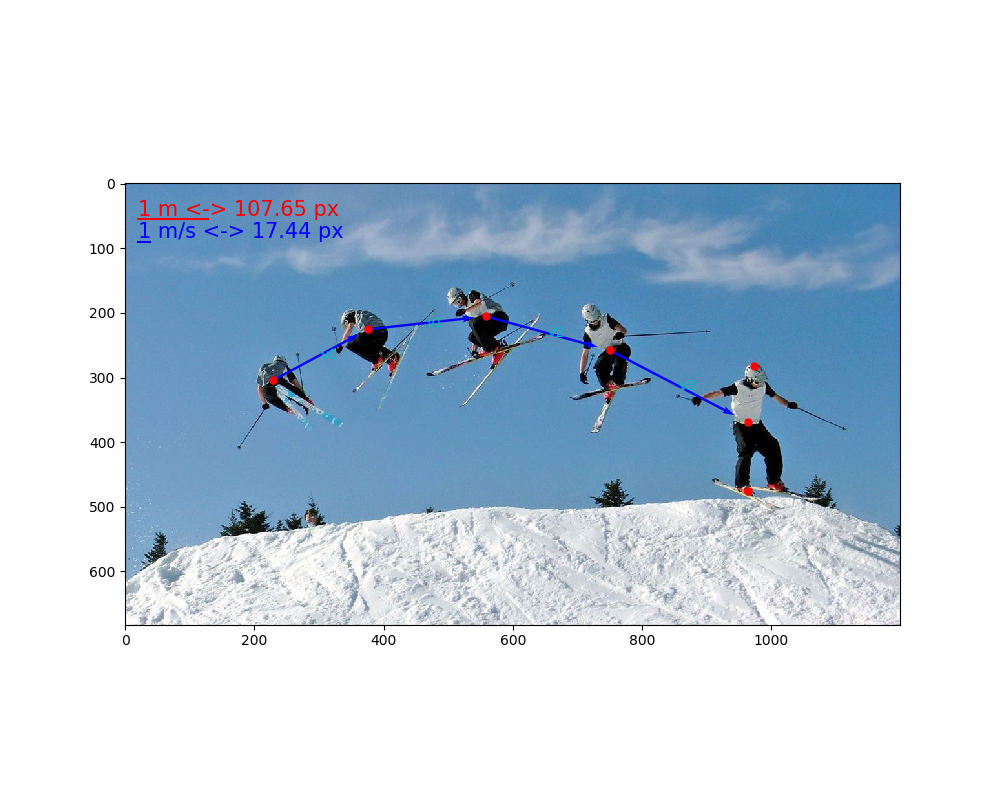

Button(description='1. Traçage échelle', style=ButtonStyle())

Output()

Button(description='2. Traçage vecteurs', style=ButtonStyle())

Output()

In [4]:
#Demander les paramètres de l'expérience
n = int(input("Analyser l'image : "))-1
dt = float(input("intervalle (ms) : "))*0.001
d = float(input("taille de l'objet-échelle (cm) : "))*0.01

#Chargement de l'image à analyser
image = image_list[n].value
from PIL import Image
import io
import math
image_data = image
image = Image.open(io.BytesIO(image_data))
from IPython.display import display

#Affichage de l'image à analyser dans une figure matplotlib en mode magic notebook
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
pts = []
fig = plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

#récupération des points sur l'image et tracé de l'échelle
def onclick(event):
    tx = 'button=%d, x=%d, y=%d, xdata=%f, ydata=%f' % (event.button, event.x, event.y, event.xdata, event.ydata)
    #text.set_text(tx)
    plt.plot(event.xdata, event.ydata, "or", markersize=5)  # or: point rouge
    pts.append([event.xdata,event.ydata])

cid = fig.canvas.mpl_connect('button_press_event', onclick)

scale = 1
pix = []
#Tracé des vecteurs vitesse sur l'image
def clk_btn1(b):
    with out1:
        if(len(pts)==2):
            p1 = pts[0]
            p2 = pts[1]
            scale = math.sqrt((p2[0]-p1[0])**2 + (p2[1]-p1[1])**2)
            pix.append(scale/d)
            pts.clear()
            #tracé de l'échelle des vitesses
            plt.plot([20, pix[0]+20], [55,55], color='r')
            scaletxt = '1 m <-> '+"%.2f" % pix[0]+ ' px'
            plt.text(20, 40, scaletxt, fontsize=15, color='r', ha='left', va='center')
            print("Tracé de l'échelle réussi : ", scaletxt)
            
btn1 = widgets.Button(description="1. Traçage échelle")
btn1.on_click(clk_btn1)
out1 = widgets.Output()
display(btn1, out1)
v=[]
def clk_btn2(b):
    with out2:
        #tracé de l'échelle des vitesses
        s = pix[0]*dt*.9
        plt.plot([20, s+20], [90,90], color='b')
        scaletxt = '1 m/s <-> '+"%.2f" % s + ' px'
        plt.text(20, 75, scaletxt, fontsize=15, color='b', ha='left', va='center')
        print("Tracé de l'échelle des vecteurs réussi : ", scaletxt)
        #Calcul et affichage de chaque vecteur vitesse
        for i in range(len(pts)-1):
            #Définition des points Mi et Mi+1 et de leurs coordonnées
            M1 = pts[i]
            x1 = M1[0]
            y1 = M1[1]
            M2 = pts[i+1]
            x2 = M2[0]
            y2 = M2[1]
            #Calcul du vecteur vitesse
            v = [(x2-x1)/pix[0]/dt,(y2-y1)/pix[0]/dt]
            norme_v = math.sqrt(v[0]**2+v[1]**2)
            #affichage de la norme du vecteur vitesse
            atext = 'v'+str(i)
            vtext = "%.1f" % norme_v+' m/s'
            print(atext, ' ', vtext)
            #affichage du vecteur vitesse
            plt.text((M1[0]+M2[0])/2, (M1[1]+M2[1])/2, atext, fontsize=10, color='c', ha='left', va='center')
            plt.quiver([x1, 0, 0], [y1, 0, 0], [v[0], 0, 0], [v[1], 0, 0], color='b', angles='xy', scale_units='xy', scale=1/pix[0]/dt/.9, width=.003)
        pix.clear()
                
btn2 = widgets.Button(description="2. Traçage vecteurs")
btn2.on_click(clk_btn2)
out2 = widgets.Output()
display(btn2, out2)